## **FOOTBALL VIDEO ANALYSIS**

3 categories: Goal, Happy and loss moments

A database for training the model is created using downloaded dataset and is labelled into the 3 categories.
Happy moments : fans cheering and players celebrating
loss moments : yellow card, red card and loss



In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
import cv2,os

data_path='/content/gdrive/MyDrive/football database'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

{'goal': 0, 'loss': 1, 'happy': 2}
['goal', 'loss', 'happy']
[0, 1, 2]


In [35]:
img_size=150
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)

    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 150 x 150, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [8]:
!pip install keras

In [36]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import to_categorical

new_target=to_categorical(target)

In [37]:
np.save('data',data)
np.save('target',new_target)

In [38]:
# TRAINING THE MODEL

data=np.load('data.npy')
target=np.load('target.npy')

In [39]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [40]:
model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(3,activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [41]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [42]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
7/7 [==============================] - 57s 8s/step - loss: 1.2099 - accuracy: 0.4259 - val_loss: 0.9938 - val_accuracy: 0.5556
Epoch 2/20
7/7 [==============================] - 71s 10s/step - loss: 0.8800 - accuracy: 0.5833 - val_loss: 0.8806 - val_accuracy: 0.6111
Epoch 3/20
7/7 [==============================] - 64s 9s/step - loss: 0.5926 - accuracy: 0.7639 - val_loss: 0.9338 - val_accuracy: 0.6111
Epoch 4/20
7/7 [==============================] - 65s 9s/step - loss: 0.4345 - accuracy: 0.8102 - val_loss: 0.4968 - val_accuracy: 0.8148
Epoch 5/20
7/7 [==============================] - 55s 8s/step - loss: 0.2877 - accuracy: 0.8981 - val_loss: 0.5581 - val_accuracy: 0.7778
Epoch 6/20
7/7 [==============================] - 55s 8s/step - loss: 0.1954 - accuracy: 0.9120 - val_loss: 0.7123 - val_accuracy: 0.7963
Epoch 7/20
7/7 [==============================] - 67s 10s/step - loss: 0.1227 - accuracy: 0.9583 - val_loss: 0.5788 - val_accuracy: 0.8333
Epoch 8/20
7/7 [================

In [43]:
from matplotlib import pyplot as plt

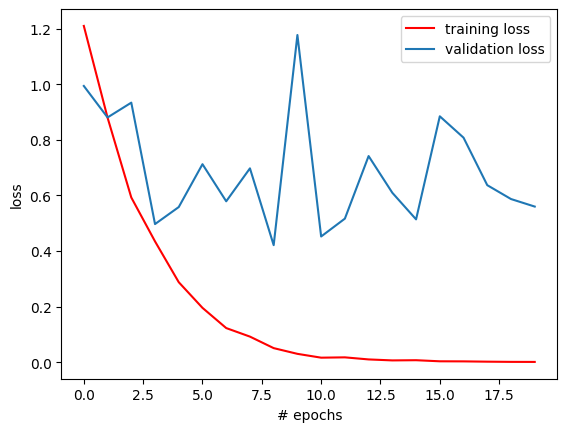

In [44]:
plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

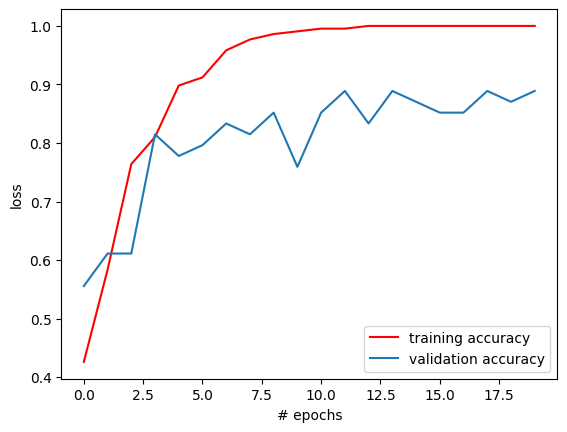

In [45]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [46]:
print(model.evaluate(test_data,test_target))

1/1 [==============================] - 3s 3s/step - loss: 2.4294 - accuracy: 0.8000
[2.4293601512908936, 0.800000011920929]


For testing the model with new video; football video from youtube is downloaded and is converted into frames

In [57]:
!pip install pytube

In [49]:
from pytube import Playlist
from pytube import Channel
import os

In [51]:
from pytube import YouTube
def Download(link):
    youtubeObject = YouTube(link)
    youtubeObject = youtubeObject.streams.get_highest_resolution()
    try:
        youtubeObject.download()
    except:
        print("An error has occurred")
    print("Download is completed successfully")

link = input("Enter the URL for football video: ")
Download(link)

Enter the URL for football video: https://www.youtube.com/watch?v=322GdVu_19E
Download is completed successfully


In [53]:
import math
count = 0
videoFile = "/content/Highlight & All goals Brazil vs Argentina I World cup Qualifiers.mp4"
cap = cv2.VideoCapture(videoFile)
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename ="frame%d.jpg" % count;count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done!")

Done!


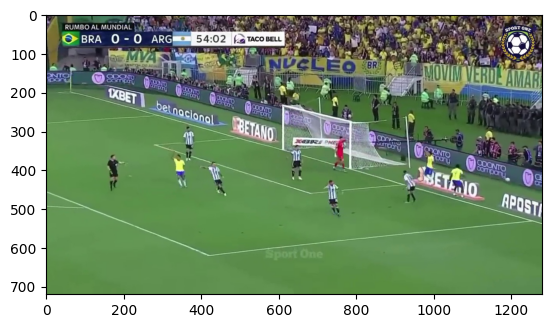

In [56]:
img = plt.imread('frame303.jpg')   # reading a frame from the video
plt.imshow(img)

In [58]:
def preprocess(img):
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #Coverting the image into gray scale
    resized=cv2.resize(gray,(img_size,img_size))#resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
    normalized=resized/255.0
    reshaped=np.reshape(normalized,(1,100,100,1))
    return reshaped

In [59]:
from keras.models import load_model
import cv2,os
import numpy as np

In [61]:
model = load_model('model-007.model')

In [ ]:
# VALIDATING WITH A NEW IMAGE
category_val={
    0: 'goal', 1: 'loss', 2: 'happy'}
datapath='/content/frame149.jpg'
img=cv2.imread(datapath)
input=preprocess(img) #preprocessing
pred=model.predict(input)
index = np.argmax(pred)
plt.title("Prediction - {}".format(category_val[index]))
plt.imshow(img)